# Exploratory Data Analysis

Author: Gillian A. McGinnis, final-semester M.S. Information Science - Machine Learning  
The University of Arizona College of Information  
INFO 698 - Capstone  
Start date: 24 September 2025  
Last updated: 04 October 2025

In [1]:
"""
Module providing supporting code and generating all images/tables for EDA.
"""

'\nModule providing supporting code and generating all images/tables for EDA.\n'

## Load Required Libraries

In [2]:
# General packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import datetime as dt

In [3]:
## (Optional chunk)
# Current session information
import session_info
session_info.show(dependencies=False)

## Load data

Files of interest:
- `weir_calibration.csv` includes calibration points for the weir
- `bci_lutzweir_combined.csv` includes raw runoff measurement, corrected runoff measurement, data source (*Chart measurements can be removed)
- `bci_cl_ra_elect2.CSV` has corrected rainfall (`ra`) in mm with measurements of `0` as `NA`s (`bci_cl_ra_elect.csv` has `0`s)
- `bci_lutz_deep_gsm_man.csv`, `bci_lutz_shallow_gsm_man.csv` have soil moisture measurements (water by wet weight and water by dry weight; one can be chosen for analysis as they are linearly related)
<!-- `bci_cl_ra_elect.csv` has corrected rainfall (`ra`) in mm, contains `0`s (large file) -->

All values level values are in mm, and datetime is in UTC-5 (Panama time zone).


### Import

In [4]:
## Calibrations dataset
data_all_calibration = pd.read_csv(
    # Location of the dataset in the repo
    "data/weir_calibration.csv",
    # Specify columns to load
    ## note- weir_hour is a repeat of the time in datetime and can be skipped
    usecols = ['datetime', 'weir_level'],
    # Convert datetime stamp strings to datetime objects
    parse_dates = ['datetime'],
    # Specify the string formatting of the datetime stamps
    date_format = "%d/%m/%Y %H:%M:%S",
    # Use datetime stamp as index
    index_col = 'datetime'
)

# Arrange chronologically
data_all_calibration = data_all_calibration.sort_index()

data_all_calibration.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6465 entries, 1994-01-03 08:46:00 to 2025-09-02 08:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   weir_level  6465 non-null   int64
dtypes: int64(1)
memory usage: 101.0 KB


In [5]:
# Combined data

data_all_combined = pd.read_csv(
    # Location of the dataset in the repo
    "data/bci_lutzweir_combined.csv",
    # Specify columns to load
    usecols = ['datetime', 'level', 'raw', 'chk_note', 'chk_fail', 'comment', 'source'],
    # Specify the types for specific columns
    dtype = {
        'chk_note':'category',
        'chk_fail':'str',
        'comment':'str',
        'source':'category'
    },
    # Convert datetime stamp strings to datetime objects
    parse_dates = ['datetime'],
    # Specify the string formatting of the datetime stamps
    date_format = "%d/%m/%Y %H:%M:%S",
    # Use datetime stamp as index
    index_col = 'datetime'
)

## This variation checks first if the dataset is already loaded into the workspace
# try:
#     if data_combined.empty == False:
#         print("Data loaded, random sample shown below")
#         print(data_combined.sample(n=5))
# except NameError:
#     print("Data has not yet been read in, loading now...")
#     data_combined = pd.read_csv(
#         "data/bci_lutzweir_combined.csv",
#         usecols = ['datetime', 'level', 'raw', 'chk_note', 'chk_fail', 'comment', 'source'],
#         parse_dates=['datetime'],
#         dtype = {'source':'category', 'chk_note':'category', 'chk_fail':'str', 'comment':'str'},
#         date_format='%d/%m/%Y %H:%M:%S'
#     )

# Arrange chronologically
data_all_combined = data_all_combined.sort_index()

data_all_combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3951119 entries, 1972-01-01 01:00:00 to 2025-08-01 13:00:00
Data columns (total 6 columns):
 #   Column    Dtype   
---  ------    -----   
 0   level     float64 
 1   raw       float64 
 2   chk_note  category
 3   chk_fail  object  
 4   comment   object  
 5   source    category
dtypes: category(2), float64(2), object(2)
memory usage: 158.3+ MB


In [6]:
# Rainfall dataset

# This data set skips the 0 readings (therefore much smaller):
data_all_rainfall = pd.read_csv(
    # Location of the dataset in the repo
    "data/bci_elect_cl_ra/bci_cl_ra_elect2.CSV",
    # Specify the types for specific columns
    dtype = {
        'chk_note':'category',
        'chk_fail':'str'
    },
    # Convert datetime stamp strings to datetime objects
    parse_dates = ['datetime'],
    # Specify the string formatting of the datetime stamps
    date_format = "%d/%m/%Y %H:%M:%S",
    # Use datetime stamp as index
    index_col = 'datetime'
)

# Arrange chronologically
data_all_rainfall = data_all_rainfall.sort_index()

## This data set includes the 0 readings:
# data_all_rainfall_zeroes = pd.read_csv(
#         "data/bci_elect_cl_ra/bci_cl_ra_elect.csv",
#         usecols = ['datetime', 'ra', 'raw', 'chk_note', 'chk_fail'],
#         # "data/bci_elect_cl_ra/bci_cl_ra_elect2.CSV",
#         # usecols = ['datetime', 'level', 'raw', 'chk_note', 'chk_fail', 'comment', 'source'],
#         parse_dates=['datetime'],
#         dtype = {'chk_note':'category', 'chk_fail':'str'},
#         # dtype = {'source':'category', 'chk_note':'category', 'chk_fail':'str', 'comment':'str'},
#         date_format='%d/%m/%Y %H:%M:%S'
#     )
# # Arrange chronologically
# data_all_rainfall_zeroes = data_all_rainfall_zeroes.sort_index()

data_all_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179640 entries, 1929-01-02 08:00:00 to 2025-08-04 11:55:00
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   ra        179640 non-null  float64 
 1   raw       179640 non-null  float64 
 2   chk_note  179640 non-null  category
 3   chk_fail  29 non-null      object  
dtypes: category(1), float64(2), object(1)
memory usage: 5.7+ MB


In [7]:
# Soil datasets

# Shallow
data_all_soil_shallow = pd.read_csv(
    # Location of the dataset in the repo
    "data/bci_manual_soilh/bci_lutz_shallow_gsm_man.csv",
    # Specify columns to load
    usecols = ['date', 'depth', 'sample', 'h2o_by_wet', 'chk_note', 'chk_fail'],
    # Specify the types for specific columns
    dtype = {
        'depth':'category',
        'sample':'category',
        'chk_note':'category',
        'chk_fail':'str'
    },
    # Convert date stamp strings to date objects
    parse_dates = ['date'],
    # Specify the string formatting of the date stamps
    date_format = "%d/%m/%Y",
    # Use date stamp as index
    index_col = 'date'
)

# Deep
data_all_soil_deep = pd.read_csv(
    # Location of the dataset in the repo
    "data/bci_manual_soilh/bci_lutz_deep_gsm_man.csv",
    # Specify columns to load
    usecols = ['date', 'depth', 'sample', 'h2o_by_wet', 'chk_note', 'chk_fail'],
    # Specify the types for specific columns
    dtype = {
        'depth':'category',
        'sample':'category',
        'chk_note':'category',
        'chk_fail':'str'
    },
    # Convert date stamp strings to date objects
    parse_dates = ['date'],
    # Specify the string formatting of the date stamps
    date_format = "%d/%m/%Y",
    # Use date stamp as index
    index_col = 'date'
)

# Arrange chronologically
data_all_soil_shallow = data_all_soil_shallow.sort_index()
data_all_soil_deep = data_all_soil_deep.sort_index()

data_all_soil_shallow.info()
data_all_soil_deep.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18556 entries, 1972-03-03 to 2025-06-26
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   depth       18556 non-null  category
 1   sample      18556 non-null  category
 2   h2o_by_wet  18556 non-null  float64 
 3   chk_note    18556 non-null  category
 4   chk_fail    178 non-null    object  
dtypes: category(3), float64(1), object(1)
memory usage: 490.8+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15637 entries, 1972-03-03 to 2025-06-26
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   depth       15637 non-null  category
 1   sample      15637 non-null  category
 2   h2o_by_wet  15637 non-null  float64 
 3   chk_note    15637 non-null  category
 4   chk_fail    20 non-null     object  
dtypes: category(3), float64(1), object(1)
memory usage: 413.4+ KB


*A note about the soil datasets:

Both `h2o_by_wet` and `h2o_by_dry` are available in the datasets.
Because they are linearly related to each other, only one of them is necessary for modelling.
Arbitrarily, `h2o_by_wet` has been chosen for this analysis.

## Clean

Data cleanup is necessary to ensure ease of uniting the sets, conducting a test/train split, and creation of & fitting of the models.

### Dates

In [8]:
# Explore: Get earliest and latest dates of sources

cat_source = data_all_combined['source'].unique().tolist()
# Header for printed table
print("Earliest", "\t    ", "Latest", "\t\t", "Source")
# Iterate across each source type
for cat in cat_source:
    # If the source is NaN
    if pd.isna(cat) == True:
        temp_subset = data_all_combined[data_all_combined['source'].isnull()]
    else:
        temp_subset = data_all_combined[data_all_combined['source'] == cat]
    # Sort index
    temp_subset = temp_subset
    # Print
    print(temp_subset.index[0], "", temp_subset.index[-1], cat)

# Save space, remove no longer needed items
del cat_source, cat, temp_subset

Earliest 	     Latest 		 Source
1972-01-01 01:00:00  2015-03-18 14:15:00 CHART
1972-09-16 00:15:00  2025-08-01 13:00:00 nan
1989-07-19 11:55:00  1996-10-01 23:55:00 CHART+AF
1996-10-02 00:00:00  2013-01-13 05:50:00 ISCO
2012-04-23 08:30:00  2012-04-24 08:35:00 ESTIMATED
2014-08-22 10:30:00  2021-05-19 09:40:00 RADAR
2018-08-31 10:05:00  2018-09-05 12:55:00 TROLL


In [9]:
# # Explore: Get earliest and latest dates of sources

# cat_source = data_all_combined.sort_index()['source'].unique().tolist()
# # Header for printed table
# print("Earliest", "\t    ", "Latest", "\t\t", "Source")
# # Iterate across each source type
# for cat in cat_source:
#     # If the source is NaN
#     if pd.isna(cat) == True:
#         temp_subset = data_all_combined[data_all_combined['source'].isnull()]
#     else:
#         temp_subset = data_all_combined[data_all_combined['source'] == cat]
#     # Sort index
#     temp_subset = temp_subset.sort_index()
#     # Print
#     print(temp_subset.index[0], "", temp_subset.index[-1], cat)

# # Save space, remove no longer needed items
# del cat_source, cat, temp_subset

#### Removing CHART Dates

Only values that are not solely reliant on CHART will be evaluated (i.e., after 1989).

In [10]:
# Filter the dataset to start once values stopped by being recorded by CHART
# date_weir_start = data_all_combined[data_all_combined['source'] == 'CHART+AF'].index[0]
date_weir_start = data_all_combined[
    # Remove CHART values
    # and
    (data_all_combined['source'] != 'CHART') &
    # Remove values without indicated source
    (~data_all_combined['source'].isnull())
    # Pull earliest timestamp
    ].index[0]
# Get latest data point timestamp
date_weir_end = data_all_combined.index[-1]

# Sanity check
# it is expected that the start timestamp will be CHART+AF source
if date_weir_start != data_all_combined[data_all_combined['source'] == 'CHART+AF'].index[0]:
    print("-----!! Warning: Check start date !!-----",
          "Calculated:\t", date_weir_start, "\n"
          "Actual:\t\t", data_all_combined[data_all_combined['source'] == 'CHART+AF'].index[0], "\n")

print("Non-CHART values:", date_weir_start, "through", date_weir_end)

Non-CHART values: 1989-07-19 11:55:00 through 2025-08-01 13:00:00


#### 2-Year Failure

The ISCO sensor failed in early 2013, and there was no backup.
Values were recording using the CHART resource, and gap filled accordingly.
Electronic recording resumed with RADAR in late 2014.

The model cannot be trained on this gap of data, as it is using `CHART` values, and all `raw` values report `-999.0`.

In [11]:
# data_gap = data_all_combined['2013-01-01 00:00:00':'2014-08-22 23:59:59']
data_gap = data_all_combined['2013-01-13 05:00:00':'2014-08-22 23:59:59']

# Get the earliest date of gap filling
date_gap_start = data_gap[data_gap['source'] == 'CHART'].index[0]

# Get the latest date of gap filling
date_gap_end = data_gap[data_gap['source'] != 'RADAR'].index[-1]

print("Two year gap:", date_gap_start, "through", date_gap_end)
## OLD EXPECTED -- 2013-01-02 18:54:38 through 2014-08-22 10:21:32
## ADJ EXPECTED -- 2013-01-13 05:54:01 through 2014-08-22 10:21:32
del data_gap

Two year gap: 2013-01-13 05:54:01 through 2014-08-22 10:21:32


#### Applying

In [12]:
# Create function to filter dates
def filter_dates(input_dataset, input_date_start, input_date_end, drop_dates = False):
# def filter_dates(input_dataset, input_date_start = date_weir_start, input_date_end = date_weir_end, drop_dates = False):
    """Filter data set to specified start and end dates.
    
    Args:
        input_dataset (pd.DataFrame): Data indexed by datetime.
        input_date_start (Timestamp): The start date, defaults to the earliest from the combined data set.
        input_date_end (Timestamp): The end date, defaults to the earliest from the combined data set.
        drop_dates (bool): Whether to remove the values between the specified dates.
    
    Returns:
        DataFrame sorted and filtered to or without the specified range.
    """
    # Sort the dataframe
    data_filtered = input_dataset.copy().sort_index()
    # Filter between dates
    if drop_dates == False:
        # data_subset = data_subset.loc[input_date_start:input_date_end]
        data_filtered = data_filtered[input_date_start:input_date_end]
    # Drop between the defined dates, if specified
    else:
        data_filtered = data_filtered.drop(data_filtered.loc[input_date_start:input_date_end].index)
    return data_filtered

In [13]:
# def remove_window(input_dataset, input_timestamp_start, input_timestamp_end):
#     """Remove window in data set between specified start and end dates.
    
#     Args:
#         input_dataset (pd.DataFrame): Data indexed and sorted by datetime.
#         input_timestamp_start (Timestamp): The timestamp for which to start removal.
#         input_timestamp_end (Timestamp): The final timestamp to removal.
    
#     Returns:
#         pd.DataFrame sorted and filtered without the specified range.
#     """
#     ## Sort the dataframe
#     # data_subset = input_dataset.sort_index()
#     # Remove the specified time window by dropping indices within the range
#     data_filtered = input_dataset.drop(input_dataset.loc[input_timestamp_start:input_timestamp_end].index)
#     return data_filtered

For large gaps, it may still be useful for the model to keep predictor variables in the time leading up to the useful weir data.

Thus, the rainfall and soil moisture data up to one month prior to any hard cutoff will be kept.

In [14]:
# Simplify data removal
def apply_filter_dates(input_dataset, input_adj = '0 D'):
    """Apply pre-defined date filters.
    
    Args:
        input_dataset (pd.DataFrame): Data indexed by datetime.
        input_adj (str): String argument to account for time leading up to weir data, defaults to none.
    
    Returns:
        pd.DataFrame filtered to the weir range and without the 2-year gap window.
    """
    # data_subset = input_dataset[(date_weir_start - pd.Timedelta(input_adj)):date_weir_end]
    # data_subset = remove_window(input_dataset = data_subset, input_timestamp_start = date_gap_start, input_timestamp_end = (date_gap_end - pd.Timedelta(input_adj)))
    data_adj = filter_dates(
        input_dataset = input_dataset,
        input_date_start = (date_weir_start - pd.Timedelta(input_adj)),
        input_date_end = date_weir_end,
        drop_dates = False
    )
    data_adj = filter_dates(
        input_dataset = data_adj,
        input_date_start = date_gap_start,
        input_date_end = (date_gap_end - pd.Timedelta(input_adj)),
        drop_dates = True
    )
    # data_subset = input_dataset[date_weir_start:date_weir_end]
    # data_subset = remove_window(input_dataset = data_subset, input_timestamp_start = date_gap_start, input_timestamp_end = date_gap_end)
    return data_adj

In [15]:
# Apply filter
gap_adj = '4 W'

data_combined = apply_filter_dates(data_all_combined)
data_calibration = apply_filter_dates(data_all_calibration)
# Include data leading up to the weir values
data_rainfall = apply_filter_dates(data_all_rainfall, gap_adj)
data_soil_shallow = apply_filter_dates(data_all_soil_shallow, gap_adj)
data_soil_deep = apply_filter_dates(data_all_soil_deep, gap_adj)

del gap_adj

In [16]:
# # Apply filter
# data_combined = filter_dates(data_all_combined, date_weir_start, date_weir_end)
# data_combined = filter_dates(data_combined, date_gap_start, date_gap_end, drop_dates = True)

# data_calibration = filter_dates(data_all_calibration, date_weir_start, date_weir_end)
# data_calibration = filter_dates(data_calibration, date_gap_start, date_gap_end, drop_dates = True)

# data_rainfall = filter_dates(data_all_rainfall, date_weir_start, date_weir_end)
# data_rainfall = filter_dates(data_rainfall, date_gap_start, date_gap_end, drop_dates = True)

# data_soil_deep = filter_dates(data_all_soil_deep, date_weir_start, date_weir_end)
# data_soil_deep = filter_dates(data_soil_deep, date_gap_start, date_gap_end, drop_dates = True)

# data_soil_shallow = filter_dates(data_all_soil_shallow, date_weir_start, date_weir_end)
# data_soil_shallow = filter_dates(data_soil_shallow, date_gap_start, date_gap_end, drop_dates = True)

In [17]:
# Remove old stuff to save space
del data_all_calibration, data_all_combined, data_all_rainfall, data_all_soil_shallow, data_all_soil_deep

### Soil depths
There are some duplicated records between the "shallow" and "deep" data set. Most are identical, but there were two dates with differing records.
It was concluded that those values from the "deep" set with a depth of "0–10" may be eliminated.

In [18]:
# Select the values in the deep data set that have the shallower depth
data_deep_subset = data_soil_deep[data_soil_deep["depth"] != "30-40"]

# Filter set to only be of dates where deep set has shallow values
data_shallow_subset = data_soil_shallow[data_soil_shallow.index.isin(data_deep_subset.index)]

# Inner merge based on date and sample number
data_soil_mismatch = pd.merge(
    data_deep_subset.reset_index(),
    data_shallow_subset.reset_index(),
    on = ["date", "sample"],
    suffixes = ("_deep", "_shallow"),
    how = "inner"
    )

# Create a variable to indicate if the values match
data_soil_mismatch["match_wet"] = (data_soil_mismatch["h2o_by_wet_deep"] == data_soil_mismatch["h2o_by_wet_shallow"])

## The dry var was not loaded in this analysis, but the exact same issue occurred in it (i.e., the same dates had mismatching values)
# match_all["match_dry"] = (match_all["h2o_by_dry_deep"] == match_all["h2o_by_dry_shallow"])

# Set the sample var to be an integer, for sorting purposes
data_soil_mismatch["sample"] = data_soil_mismatch["sample"].astype('int')

# Sort by date and sample for readability
data_soil_mismatch = data_soil_mismatch.sort_values(by = ['date', 'sample'])

# Remove unneeded columns
data_soil_mismatch = data_soil_mismatch.drop(['chk_fail_shallow', 'chk_fail_deep'], axis=1)

# Filter where there is a mismatch
data_soil_mismatch = data_soil_mismatch[(data_soil_mismatch["match_wet"] == False)]

# Reordering vars for readability
data_soil_mismatch = data_soil_mismatch[['date', 'depth_shallow', 'depth_deep', 'sample', 'h2o_by_wet_shallow', 'h2o_by_wet_deep', 'chk_note_shallow', 'chk_note_deep']]

# Print result
data_soil_mismatch

,date,depth_shallow,depth_deep,sample,h2o_by_wet_shallow,h2o_by_wet_deep,chk_note_shallow,chk_note_deep
0,1989-06-23,10-20,40-50,1,34.7,35.5,good,good
1,1989-06-23,1-10,40-50,1,35.4,35.5,good,good
27,1989-06-23,1-10,10-20,1,35.4,34.7,good,good
42,1989-06-23,10-20,20-30,1,34.7,36.3,good,good
43,1989-06-23,1-10,20-30,1,35.4,36.3,good,good
19,1989-06-23,1-10,40-50,2,40.4,36.4,good,good
29,1989-06-23,1-10,10-20,2,40.4,36.4,good,good
44,1989-06-23,10-20,20-30,2,36.4,35.5,good,good
45,1989-06-23,1-10,20-30,2,40.4,35.5,good,good
2,1989-06-23,10-20,40-50,3,35.9,35.1,good,good


In [19]:
# Cleanup
del data_shallow_subset, data_deep_subset, data_soil_mismatch

In [20]:
# Remove the duplicated samples
data_soil_deep = data_soil_deep[data_soil_deep["depth"] != "0-10"]

### CHART Removals

Only non-CHART values will be used for making the model.
Prior to removing them, other missing values must also be dealt with, as they may relate to gaps within CHART-reliant ranges.

In [23]:
# Backup
data_combined_nochart = data_combined.copy()
# data_combined_nochart = data_all_combined.copy()

# Create a column which will forward fill the source--i.e., fill NAs with the most recent value reported in 'source'
data_combined_nochart['source_ffill'] = data_combined_nochart['source'].ffill()

# Create a column which will back fill the source--i.e., fill NAs with the next value reported in 'source'
data_combined_nochart['source_bfill'] = data_combined_nochart['source'].bfill()

# Filtering to remove CHART values and gap fills that rely on CHART values
data_combined_nochart = data_combined_nochart[
    # Remove CHART values
    (data_combined_nochart['source'] != "CHART") &
    # Remove NA values where the most recent source was CHART
    (data_combined_nochart['source_ffill'] != "CHART") &
    # Remove NA values where the next source is CHART
    (data_combined_nochart['source_bfill'] != "CHART")
]

# Remove extra variables
data_combined_nochart = data_combined_nochart.drop(['source_ffill', 'source_bfill'], axis=1)

In [26]:
data_combi_backup = data_combined.copy()

data_combi_backup = data_combi_backup.drop(data_combined_nochart.index)

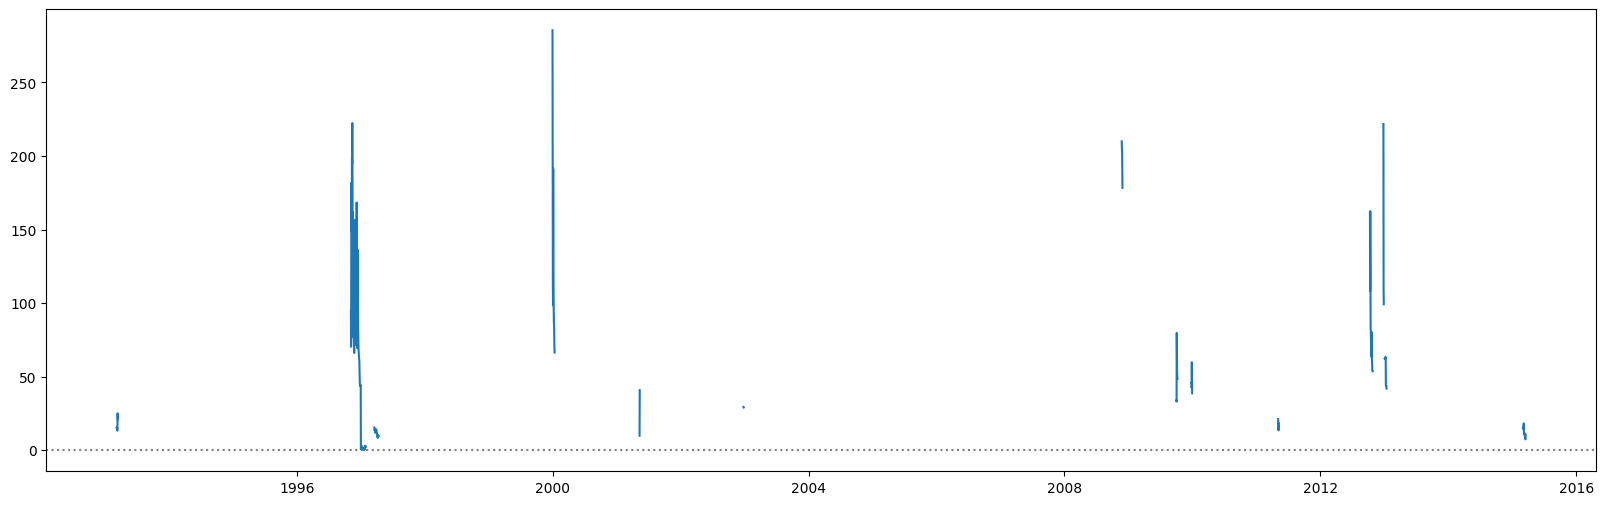

In [ ]:
# # data_combined[data_combined['source'] == 'CHART']
# data_combi_chart = data_combi_backup['level'].resample('D').mean().rename("n")
# data_combi_chart = data_combi_chart.replace(0, np.nan)
# # data_chart = data_chart[data_chart > 0]
# # data_chart[data_chart["n"] > 0]
# # data_chart.columns

# # data_chart[data_chart['0'] != 0]
# # data_chart.rename(columns={0: "blah"})

# plt.figure(figsize=(20, 6))
# plt.axhline(y=0, color ='grey', linestyle = ':')
# # plt.scatter(data_chart.index, data_chart, marker="x")
# plt.plot(data_combi_chart.index, data_combi_chart)
# plt.show()


In [ ]:
# date_weir_start
# ## EXPECTED -- 2013-01-02 18:54:38 - 2014-08-22 10:21:32
# ## ADJ EXPECTED -- 2013-01-13 05:54:01 through 2014-08-22 10:21:32
# data_all_soil_deep['1989-06-01 00:00:00':'1989-07-19 11:55:00']
# gap_dates = set()
# for dt_stamp in data_combined_nochart['2013-01-02 18:54:38':'2014-08-22 10:21:32'].index.unique():
# # for dt_stamp in data_combined_nochart[date_gap_start:date_gap_end].index.unique():
#     date_stamp = dt_stamp.date()
#     gap_dates.add(date_stamp)

# gap_dates

In [ ]:
# data_combined_nochart[data_combined_nochart['raw']==-999.0]

,level,raw,chk_note,chk_fail,comment,source
datetime,,,,,,
1997-07-19 23:55:00,33.36,-999.0,adjusted,Gap Fill,NaN,NaN
1997-07-20 00:00:00,33.36,-999.0,adjusted,Gap Fill,NaN,NaN
1997-07-20 00:05:00,33.35,-999.0,adjusted,Gap Fill,NaN,NaN
1997-07-20 00:10:00,33.35,-999.0,adjusted,Gap Fill,NaN,NaN
1997-07-20 00:15:00,33.35,-999.0,adjusted,Gap Fill,NaN,NaN
...,...,...,...,...,...,...
2025-07-24 15:55:00,0.00,-999.0,missing,NaN,NaN,NaN
2025-07-25 09:10:00,62.96,-999.0,adjusted,Gap Fill,NaN,NaN
2025-07-25 09:15:00,62.87,-999.0,adjusted,Gap Fill,NaN,NaN


### Missing

In [ ]:
# data_combined['source'].value_counts(dropna=False)
# data_combined['chk_note'].value_counts(dropna=False)
data_combined.groupby(['chk_note', 'source'],dropna=False).size()
# data_combined[data_combined['source'].isnull()]

Other gaps of missing values occur and should be addressed.
These can be identified by the `chk_note` of 'missing' with a `raw` values of -999.0.

A `chk_note` of 'missing' differs from instances of where a `chk_fail` is a 'Gap Fill'.

In [ ]:
data_combined.groupby(['chk_note', 'chk_fail'],dropna=False).size()

In [ ]:
# data_combined[(data_combined['chk_note'] == 'missing') & (data_combined['raw'] != -999.0)]
# data_combined[data_combined['source'].isnull()]
# data_combined['1997-01-01 00:00:00':'1997-01-01 23:59:59']
# data_combined[data_combined['source']=='CHART']
data_combined[(data_combined['chk_note'] == 'missing') & (data_combined['source'] == 'CHART')]
# data_combined[(data_combined['chk_note'] == 'missing') & (data_combined['level'] != 0)]
# data_combined['1993-03-08 00:00:00':'1993-03-08 23:59:59']

In [ ]:
# data_combined[data_combined['source'] == 'CHART']
data_chart = data_combined[data_combined['source'] == 'CHART'].resample('D').size().rename("n")
data_chart = data_chart.replace(0, np.nan)
# data_chart = data_chart[data_chart > 0]
# data_chart[data_chart["n"] > 0]
# data_chart.columns

# data_chart[data_chart['0'] != 0]
# data_chart.rename(columns={0: "blah"})

plt.figure(figsize=(20, 6))
plt.axhline(y=0, color ='grey', linestyle = ':')
# plt.scatter(data_chart.index, data_chart, marker="x")
plt.plot(data_chart.index, data_chart)
plt.show()


In [ ]:
# # data_combined.index isin data_chart.dropna().index
# # data_chart.dropna()
# data_tally = data_combined["source"]
# data_tally = pd.DataFrame(data_tally)
# # data_tally['B'] = (~(data_combined["source"] == "CHART")).cumsum()
# # data_tally["2000-01-01 00:00:00"]
# # data_tally
# # data_tally['B'] = (~df['A']).cumsum()
# # data_tally['A'].sum()
# # data_tally['C'] = data_tally.duplicated(['source', 'B'], keep='first')
# # data_tally['C'].sum()

# data_tally['A'] = (data_tally["source"]=="CHART")
# # data_tally['B'] = (~data_tally['A']).cumsum()
# # data_tally['C'] = data_tally.duplicated(['A', 'B'], keep='first')
# # data_tally['C'].sum()
# # data_tally


# (data_tally['A']&data_tally['A'].shift(fill_value=False)).sum()

In [ ]:
# data_chart_days["chk_fail"].str.contains("Gap Fill").dropna()
# data_chart_days[(data_chart_days["chk_fail"] == "Gap Fill")]

In [ ]:
# data_chart.dropna().index
# data_combined.index.date
# data_chart.dropna().index.date
# data_combined.index.date
dates_to_filter = data_chart.dropna().index.date
# dates_to_filter.date
data_chart_days = data_combined[data_combined.index.floor('D').isin(dates_to_filter)]
# data_chart_days
# data_chart_days["source"].groupby(data_chart_days["source"].ne(data_chart_days["source"].shift()).cumsum()).cumcount()
# data_chart_days["tally"] = data_chart_days["source"].ne(data_chart_days["source"].shift()).cumsum()
# condition_gap = (data_chart_days["raw"] == -999.0) & (data_chart_days["chk_fail"] == "Gap Fill") & (data_chart_days["source"].isnull())
# data_chart_days[condition_gap]

# condition_gap = (data_chart_days["raw"] == -999.0) & (data_chart_days["chk_fail"].str.contains("Gap Fill")) & (data_chart_days["source"].isnull())
# # data_chart_days["source_mod"] = data_chart_days["source_mod"].astype(str)
# # data_chart_days.loc[condition_gap, "source_mod"] = "NA"

# data_chart_days["source_mod"] = data_chart_days["source"]
# data_chart_days.loc[condition_gap, "source_mod"] = "CHART"
# data_chart_days.loc[(data_chart_days["chk_note"] == "missing"), "source_mod"] = "CHART"

##
data_chart_days["source_mod"] = data_chart_days["source"]
data_chart_days["source_mod"] = data_chart_days["source_mod"].ffill()
##

# data_chart_days["source_mod"] = data_chart_days[]

# data_chart_days = data_chart_days.drop(['chk_note', 'chk_fail', 'comment'],axis=1)

# data_chart_days.loc[(data_chart_days["source_mod"].isnull())]
data_chart_days["group_tally"] = data_chart_days["source_mod"].ne(data_chart_days["source_mod"].shift()).cumsum(skipna=False)
data_chart_days["tally"] = data_chart_days["source_mod"].groupby(data_chart_days["source_mod"].ne(data_chart_days["source_mod"].shift()).cumsum(skipna=False)).cumcount()

data_chart_days["tally"] = data_chart_days["tally"]+1
# data_chart_days

# data_chart_days.groupby('group_tally')['tally'].max()
data_grouped_tally = data_chart_days.groupby('group_tally')['tally'].max()
# data_grouped_tally[data_grouped_tally == 1]
# data_grouped_tally == 1

data_chart_days[data_chart_days["group_tally"].isin(data_grouped_tally[data_grouped_tally == 1].index)]
# 1996-11-12 01:25:00, 2007-10-01 09:46:00
# data_chart_days["2007-10-01 00:00:00":"2007-10-01 23:59:59"]
# data_chart_days["group"]
# data_chart_days.loc[data_grouped_tally["tally"], "tally"]

# data_chart_days
# data_grouped_tally[data_grouped_tally == 1].index
# data_chart_days["tally"] == 1

# data_chart_days = data_chart_days.drop(['chk_note', 'chk_fail', 'comment'],axis=1)
# data_chart_days["group_tally"] = data_chart_days["source"].ne(data_chart_days["source"].shift()).cumsum()
# data_chart_days["tally"] = data_chart_days["source"].groupby(data_chart_days["source"].ne(data_chart_days["source"].shift()).cumsum()).cumcount()
# data_chart_days

# plt.figure(figsize=(20, 6))
# plt.axhline(y=0, color ='grey', linestyle = ':')
# # plt.scatter(data_chart.index, data_chart, marker="x")
# for source in data_chart_days["source"].unique():
#     # plt.scatter(data_chart_days.index, (data_chart_days["source"]==source))
#     plt.scatter(range(len(data_chart_days)), (data_chart_days["source"]==source), label=source, s=0.25)
#     # plt.scatter(range(len(data_chart_days)), data_chart_days[data_chart_days["source"]==source]["level"])
# # plt.scatter(range(len(data_chart_days)), data_chart_days['raw'], hue="source")
# plt.legend()
# plt.show()
# # data_combined[data_combined.index.isin(data_chart.dropna().index)]
# # data_combined.loc[data_chart.dropna().index.date]


In [ ]:
# data_combined[(data_combined['chk_note']=="missing") & (data_combined['level']!= 0)]
# data_combined[(data_combined['chk_note']!="missing") & (data_combined['raw']== -999.0)]
# data_combined[(data_combined['chk_note']=="missing") & (data_combined['raw']== -999.0)]
# data_combined[(data_combined['chk_fail'].str.contains("Gap Fill") == False) & (data_combined['chk_note']!="missing") & (data_combined['raw']== -999.0)]
# data_combined[(data_combined['chk_fail'].str.contains("Gap Fill") == False) & (data_combined['raw']== -999.0)]
# data_combined[(data_combined['raw']== -999.0) & (data_combined['level']!=0)]
# data_combined[(data_combined['chk_note']=="missing") & (data_combined['raw']!= -999.0)]
# print(len(data_combined[(data_combined['chk_note']!="missing") & (data_combined['source']!= "CHART")]))
# print(len(data_combined[(data_combined['chk_note']!= "missing")]))
# print(len(data_combined[(data_combined['source']== "CHART")]))

# print(len(data_combined[(data_combined['chk_note']!= "missing")]) - len(data_combined[(data_combined['source']== "CHART")]))

# data_combined[(data_combined['chk_note']!="missing") & (data_combined['source']== "CHART")]
# dates_gaps = set(data_combined[(data_combined['chk_fail'].str.contains("Gap Fill", na=False))].index.date)

# data_combined[data_combined.index.floor('D').isin(dates_gaps)]

data_mixed = data_combined.copy()
data_mixed["source_ffill"] = data_mixed["source"].ffill()
data_mixed["source_bfill"] = data_mixed["source"].bfill()
# data_mixed[(data_mixed['chk_fail'].str.contains("Gap Fill")) | (data_mixed['chk_note']=="missing") | (data_mixed['raw']== -999.0)]

# data_mixed[(data_mixed['chk_fail'].str.contains("Gap Fill")) & (data_mixed['source'].isnull()) & ((data_mixed['source_ffill'] != "CHART") | (data_mixed['source_bfill'] != "CHART"))]
# 07-09
# data_mixed["1997-07-17 00:00:00":"1997-07-21 23:59:59"]
# data_mixed["1997-03-19 00:00:00":"1997-03-19 23:59:59"]
# print(len(data_mixed[(data_mixed['source'] == "CHART")]),
#     len(data_mixed[(data_mixed['source_bfill'] == "CHART") & (data_mixed['chk_fail'].str.contains("Gap Fill", na=False))])
# )

data_mixed[(data_mixed["source_bfill"] != data_mixed["source_ffill"]) & ((data_mixed["source_bfill"] != "CHART") | (data_mixed["source_ffill"] != "CHART"))]
# data_mixed["2002-12-27 07:00:00":"2002-12-27 10:00:00"]

# data_mixed[data_mixed['chk_']]
# data_combined[(data_combined['chk_fail'].str.contains("Gap Fill", na=False))]
# len(data_combined[(data_combined['chk_note']!="missing")]) + len(data_combined[(data_combined['source']!= "CHART")])

# set(data_combined[data_combined['raw'] == -999.0].index.date)

In [ ]:

data_mixed_filtered = data_mixed[
    (data_mixed["source"] != "CHART") &
    ((data_mixed["source_ffill"] == data_mixed["source_bfill"]) | data_mixed["source_bfill"].isnull()) &
    (data_mixed["source_ffill"] != "CHART") &
    (data_mixed["source_bfill"] != "CHART")
    ]#["2002-12-26 00:00:00":"2002-12-26 23:59:59"]

# data_mixed_filtered[~data_mixed_filtered["chk_fail"].isnull()]["chk_fail"].unique()
# data_mixed_filtered[data_mixed_filtered["chk_fail"].str.contains("Gap Fill", na=False)]["chk_note"].unique()
# data_mixed_filtered[data_mixed_filtered["raw"] == -999.0]

# data_mixed_filtered[data_mixed_filtered["chk_note"] == "missing"]
# data_mixed_filtered[(data_mixed_filtered["raw"] == -999.0)]["chk_fail"].unique()
# data_mixed_filtered[(data_mixed_filtered["raw"] == -999.0) & (data_mixed_filtered["level"] != 0)]#["chk_fail"].unique()
data_mixed_filtered[(data_mixed_filtered["raw"] < 0) & (data_mixed_filtered["raw"] != -999.0) & (data_mixed_filtered["level"] > 0)]
# data_mixed_filtered[(data_mixed_filtered["raw"] == -999.0) & (data_mixed_filtered["chk_fail"].isnull())]


In [ ]:
data_combined[data_combined["chk_fail"].str.contains(",", na=False)]

In [ ]:
data_mixed_filtered_sumstats = data_mixed_filtered['raw'].dropna().resample('1ME').agg(['count', 'mean','std', 'min', 'max'])

# data_mixed[
#     # (data_mixed["source"] == "CHART") |
#     ((data_mixed["source_ffill"] != data_mixed["source_bfill"]))
#     # data_mixed["source"].isnull()
#     ]

# data_mixed[((data_mixed["source_ffill"] != data_mixed["source_bfill"]))]
# data_mixed["2002-12-26 00:00:00":"2002-12-26 23:59:59"]

fig, ax = plt.subplots(figsize=(20, 3))
## Line for 0
plt.axhline(y=0, color = "grey", linestyle = ":")
# Mean
ax.plot(data_mixed_filtered_sumstats.index, data_mixed_filtered_sumstats['mean'], color = 'green')
# ax.plot(data_sumstats.index, data_sumstats['mean'], color = 'green', label = "Mean")
# Ribbon for standard deviation
# ax.fill_between(data_mixed_filtered_sumstats.index, data_mixed_filtered_sumstats['mean']-data_mixed_filtered_sumstats['std'], data_mixed_filtered_sumstats['mean']+data_mixed_filtered_sumstats['std'], color = 'aquamarine', label = "std")
ax.set_xlabel("Year")
ax.set_ylabel("Level (mm)")
ax.set_title("Average raw values every 1mo")
# ax.set_ylim(bottom = 0)
ax.set_xlim(left = dt.date(1989, 1, 1), right = dt.date(2026, 1, 1))
ax.xaxis.set_major_locator(mdates.YearLocator(month = 1)) # Show ticks at start of year
plt.xticks(rotation = 90)
plt.tight_layout()
plt.grid(axis = 'x', which = 'major')
# plt.legend(loc = 'upper right')
# Truncate plot
# ax.set_ylim(bottom = 0, top = 250)

plt.show()

del fig, ax

## Exploration

In [ ]:
data_nochart = data_combined.copy()
data_nochart['source_ffill'] = data_nochart['source'].ffill()
data_nochart['source_bfill'] = data_nochart['source'].bfill()
data_nochart = data_nochart[
    (data_nochart['source'] != "CHART") &
    (data_nochart['source_ffill'] != "CHART") &
    (data_nochart['source_bfill'] != "CHART")
]

# data_mixed_filtered_sumstats = data_mixed_filtered['raw'].dropna().resample('1ME').agg(['count', 'mean','std', 'min', 'max'])
data_mixed_filtered_sumstats = data_nochart['raw'].dropna().resample('1W').agg(['count', 'mean','std', 'min', 'max'])
# data_mixed_filtered_sumstats = data_nochart['raw'].dropna().resample('1ME').agg(['count', 'mean','std', 'min', 'max'])

# data_mixed[
#     # (data_mixed["source"] == "CHART") |
#     ((data_mixed["source_ffill"] != data_mixed["source_bfill"]))
#     # data_mixed["source"].isnull()
#     ]

# data_mixed[((data_mixed["source_ffill"] != data_mixed["source_bfill"]))]
# data_mixed["2002-12-26 00:00:00":"2002-12-26 23:59:59"]

fig, ax = plt.subplots(figsize=(20, 3))
## Line for 0
plt.axhline(y=0, color = "grey", linestyle = ":")
# Mean
ax.plot(data_mixed_filtered_sumstats.index, data_mixed_filtered_sumstats['mean'], color = 'green')
# ax.plot(data_sumstats.index, data_sumstats['mean'], color = 'green', label = "Mean")
# Ribbon for standard deviation
# ax.fill_between(data_mixed_filtered_sumstats.index, data_mixed_filtered_sumstats['mean']-data_mixed_filtered_sumstats['std'], data_mixed_filtered_sumstats['mean']+data_mixed_filtered_sumstats['std'], color = 'aquamarine', label = "std")
ax.set_xlabel("Year")
ax.set_ylabel("Level (mm)")
ax.set_title("Average raw values every 1mo")
# ax.set_ylim(bottom = 0)
ax.set_xlim(left = dt.date(1989, 1, 1), right = dt.date(2026, 1, 1))
ax.xaxis.set_major_locator(mdates.YearLocator(month = 1)) # Show ticks at start of year
plt.xticks(rotation = 90)
plt.tight_layout()
plt.grid(axis = 'x', which = 'major')
# plt.legend(loc = 'upper right')
# Truncate plot
# ax.set_ylim(bottom = 0, top = 250)

plt.show()

del fig, ax

In [ ]:
# data_nochart[data_nochart['raw'] < 0]
data_nochart[data_nochart['raw'] < 0]['raw'].dropna().resample('1ME').agg(['count', 'mean','std', 'min', 'max']).dropna()

### General Variables

In [ ]:
# Explore weir combined data, comments, etc.
print(
    "-----Data types-----", data_combined.dtypes,
    "\n-----Source-----", data_combined['source'].value_counts(dropna = False),
    "\n-----Notes-----", data_combined['chk_note'].value_counts(dropna = False),
    "\n-----Comments-----", data_combined['comment'].value_counts(dropna = False),
    "\n-----Fail mode-----", data_combined['chk_fail'].value_counts(dropna = False),
    sep="\n"
)

### Visualization

In [42]:
def plot_between(input_date_start, input_date_end, include_calibration=True):
    """Plot values between two dates in the style of the Visual FoxPro interface.

    Args:
        input_date_start (Timestamp): The start date.
        input_date_end (Timestamp): The end date.
        include_calibration (boolean): Include X-markers for the calibration points.
    
    Returns:
        Time series plot.
    """
    # Filter the data sets
    data_subset = data_combined.loc[input_date_start:input_date_end]
    data_subset_rain = data_rainfall.loc[input_date_start:input_date_end]
    data_subset_cal = data_calibration.loc[input_date_start:input_date_end]

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.axhline(y=0, color ='grey', linestyle = ':')
    # Plot the rain as a bar chart with a multiplier for visibility
    ax.vlines(data_subset_rain.index, ymin=0, ymax=data_subset_rain['ra']*3, color = 'blue', label = "Rain (x3)")
    ax.plot(data_subset.index, data_subset['level'], color = 'red', label = "Adjusted")
    ax.plot(data_subset.index, data_subset['raw'], color = 'green', label = "Raw")
    # Include calibration points unless otherwise specified or unless there are none in the subset
    if include_calibration == True and not data_subset_cal.empty:
        ax.plot(data_subset_cal.index, data_subset_cal['weir_level'], linestyle='none', marker='x', color='red', label = "Calibration")

    # Plot labels
    ax.set_xlabel("Date (YYYY-MM-DD)")
    ax.set_ylabel("Level (mm)")
    # ax.set_title('Simple Time Series Plot')
    ax.set_title("Runoff time series from " + input_date_start + " through " + input_date_end)
    # ax.set_ylim(bottom=0) 
    # ax.grid(True)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    # Reverse the order of the legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper right')
    # plt.legend(loc = 'upper right')
    return plt.show()

In [ ]:
plot_between('2010-05-20 00:00:00','2010-05-25 23:59:59')
# plot_between('2020-05-31 00:00:00','2020-06-16 23:59:59')
plot_between('2023-05-14 00:00:00','2023-06-15 23:59:59')
# plot_between('2002-07-30 00:00:00','2002-08-02 23:59:59')

In [ ]:
# plot_between('2013-01-02 18:59:38', '2014-08-22 10:21:32', include_calibration=False)
# plot_between('2012-12-15 00:00:00', '2013-01-02 23:59:59', include_calibration=False)
# data_combined['2012-12-25 00:00:00':'2012-12-28 23:59:59']
plot_between('2023-03-01 00:00:00','2023-06-01 00:00:00')

### Statistics

In [ ]:
# Source insights
print(data_combined['1978-01-01 00:00:00':].groupby('source', dropna=False, observed=True)['raw'].agg(['count','mean', 'min', 'max']))

In [ ]:
# time_series = pd.Series(data_combined, index='datetime')
# time_series
# pd.DatetimeIndex.to_series(data_combined)
# time_series = pd.to_datetime(data_combined.index())

# data_sumstats = data_combined['raw'].dropna().resample('1YE').agg(['mean','std', 'min', 'max']).dropna()
# data_sumstats

# Removing values below 0
data_sumstats = data_combined[data_combined['raw'] >= 0]
# Get yearly averages and std
data_sumstats_yr = data_sumstats['raw'].dropna().resample('1YE').agg(['count', 'mean','std', 'min', 'max'])
# Get monthly averages and std
data_sumstats = data_sumstats['raw'].dropna().resample('1ME').agg(['mean','std'])

# Simplifying datetime to the year for readability
data_sumstats_yr = data_sumstats_yr.reset_index()
data_sumstats_yr['year'] = data_sumstats_yr['datetime'].dt.year
data_sumstats_yr = data_sumstats_yr.set_index('year').drop('datetime', axis=1)
print(data_sumstats_yr)

In [ ]:
#Running avg plot

fig, ax = plt.subplots(figsize=(10, 3))
## Line for 0
# plt.axhline(y=0, color = "grey", linestyle = ":")
# Mean
ax.plot(data_sumstats.index, data_sumstats['mean'], color = 'green')
# ax.plot(data_sumstats.index, data_sumstats['mean'], color = 'green', label = "Mean")
# Ribbon for standard deviation
# ax.fill_between(data_sumstats.index, data_sumstats['mean']-data_sumstats['std'], data_sumstats['mean']+data_sumstats['std'], color = 'aquamarine', label = "std")
ax.set_xlabel("Year")
ax.set_ylabel("Level (mm)")
ax.set_title("Average raw values every 1mo")
ax.set_ylim(bottom = 0)
ax.set_xlim(left = dt.date(1989, 1, 1), right = dt.date(2026, 1, 1))
ax.xaxis.set_major_locator(mdates.YearLocator(month = 1)) # Show ticks at start of year
plt.xticks(rotation = 90)
plt.tight_layout()
plt.grid(axis = 'x', which = 'major')
# plt.legend(loc = 'upper right')
# Truncate plot
# ax.set_ylim(bottom = 0, top = 250)

plt.show()

del fig, ax

## Uniting

The calibration, combined (runoff), and rainfall data can be united into a single data frame.
Soil samples do not have the same granularity, so can be stored separately from these so as to avoid duplicated values.

In [ ]:
# ## TSTING UNIFICATION WITH SMALL SUBSET
# # data_united = data_combined['2010-01-01 00:00:00':'2010-12-31 23:59:59']
# # data_united = data_united.add_suffix("_runoff")
# mini_start = '2010-01-01 00:00:00'
# mini_end = '2010-12-31 23:59:59'
# mini_calibration = data_calibration[mini_start:mini_end]
# mini_combined = data_combined[mini_start:mini_end]
# mini_rain = data_rainfall[mini_start:mini_end]

# # pd.merge(mini_calibration, mini_combined, left_index=True, right_index=True, how='outer', suffixes=('_cal', '_runoff'))
# mini_united = pd.merge(mini_calibration.add_suffix("_cal"), mini_combined.add_suffix("_ro"), left_index=True, right_index=True, how='outer')
# mini_united = pd.merge(mini_rain.add_suffix("_rain"), mini_united, left_index=True, right_index=True, how='outer')
# # mini_united.rename(columns={'weir_level'})
# # mini_united.dropna(subset=['weir_level_cal'])

# # Checking to make sure sources match
# # mini_united["match_source"] = (mini_united["source_ro"] == mini_united["source_rain"]) | (mini_united["source_ro"].isnull() & mini_united["source_rain"].isnull())
# # mini_united[(mini_united["match_source"]==False)]
# # mini_united

# # mini_united = mini_united.drop("source_rain",axis=1)
# # mini_united.rename(columns={"source_ro":"source"})

In [ ]:
## Another
# pd.merge(data_soil_deep.add_suffix("_shallow"), data_soil_deep.add_suffix("_deep"), left_index=True, right_index=True, how='outer')
united_soil = pd.merge(data_soil_shallow.reset_index(), data_soil_deep.reset_index(), on=["date", "sample"], suffixes=("_shallow", "_deep"), how="outer")
united_soil = united_soil.set_index('date')
# Modifying sample to int for sorting
united_soil["sample"] = united_soil["sample"].astype('int')
# Sorting for readability
united_soil = united_soil.sort_values(by=['date', 'sample'])
# Reset to category
united_soil["sample"] = united_soil["sample"].astype('category')
# Moving sample to front of data frame
soil_samples = united_soil.pop('sample')
united_soil.insert(0, 'sample', soil_samples)
del soil_samples
#
united_soil

# Missing values:
# united_soil[united_soil['h2o_by_wet_shallow'].isnull() | united_soil['h2o_by_wet_deep'].isnull()]

In [ ]:
# Checking column matching
# Checking to make sure sources match
def check_cols(input_df, input_col_left, input_col_right, find_mismatch=True):
    input_df["match"] = (input_df[input_col_left] == input_df[input_col_right]) | (input_df[input_col_left].isnull() & input_df[input_col_right].isnull())
    if find_mismatch == True:
        input_df = input_df[(input_df["match"]==False)]
    return input_df

# check_cols(mini_united, "source_ro", "source_rain")
# check_cols(mini_united, "chk_note_rain", "chk_note_ro")
# check_cols(mini_united, "comment_rain", "comment_ro")

# check_cols(mini_united, 'chk_note_rain', 'chk_note_ro')
# mini_united.dropna(subset="chk_note_rain")
# check_cols(mini_united, 'chk_fail_rain', 'chk_fail_rain')

In [ ]:
united_water = pd.merge(data_rainfall.add_suffix("_rain"), data_combined.add_suffix("_ro"), left_index=True, right_index=True, how='outer')
united_water = pd.merge(data_calibration.add_suffix("_cal"), united_water, left_index=True, right_index=True, how='outer')
united_water.info()

In [ ]:
## Another
united_soil = pd.merge(data_soil_shallow.reset_index(), data_soil_deep.reset_index(), on=["date", "sample"], suffixes=("_shallow", "_deep"), how="outer")
united_soil = united_soil.set_index('date')
# Modifying sample to int for sorting
united_soil["sample"] = united_soil["sample"].astype('int')
# Sorting for readability
united_soil = united_soil.sort_values(by=['date', 'sample'])
# Reset to category
united_soil["sample"] = united_soil["sample"].astype('category')
# Moving sample to front of data frame
soil_samples = united_soil.pop('sample')
united_soil.insert(0, 'sample', soil_samples)
#
united_soil.info()

# Missing values:
# united_soil[united_soil['h2o_by_wet_shallow'].isnull() | united_soil['h2o_by_wet_deep'].isnull()]

In [ ]:
united_soil_mini = united_soil[['sample', 'h2o_by_wet_shallow', 'h2o_by_wet_deep']]
united_soil_mini = united_soil_mini.groupby('sample').resample('1ME').mean().reset_index().set_index('date')
# united_soil_mini = united_soil[['h2o_by_wet_shallow', 'h2o_by_wet_deep']]
# united_soil_mini = united_soil_mini.resample('1ME').mean()#.reset_index().set_index('date')

united_soil_mini

In [ ]:
#Running avg plot

fig, ax = plt.subplots(figsize=(15, 3))
## Line for 0
# plt.axhline(y=0, color = "grey", linestyle = ":")
# Mean
# ax.plot(united_soil_mini.index, united_soil_mini['h2o_by_wet_shallow'], color = 'pink')
# ax.plot(united_soil_mini.index, united_soil_mini['h2o_by_wet_deep'], color = 'purple')

ax2 = ax.twinx()
# zord = 1
for category, group_df in united_soil_mini.groupby('sample'):
    # ax2.plot(group_df.index, group_df['h2o_by_wet_shallow'], label=category, alpha=0.5, color='orange', linewidth = 0.25, zord = 1)
    ax2.plot(group_df.index, group_df['h2o_by_wet_shallow'], label=category, alpha=0.75, color='orange', linewidth = 0.25)
    # zord += 1
# for category, group_df in united_soil_mini.groupby('sample'):
    ax2.plot(group_df.index, group_df['h2o_by_wet_deep'], label=category, alpha=0.75, color='purple', linewidth = 0.25)
    # zord += 1
# ax.plot(united_soil_mini.index, united_soil_mini['h2o_by_wet_shallow'], label="Shallow", color='orange', linewidth = 0.5)
# ax.plot(united_soil_mini.index, united_soil_mini['h2o_by_wet_deep'], label="Deep", color='purple', linewidth = 0.5)

# ax.plot(data_sumstats.index, data_sumstats['mean'], color = 'green', zorder = zord)
ax.plot(data_sumstats.index, data_sumstats['mean'], color = 'green')

# ax.plot(data_sumstats.index, data_sumstats['mean'], color = 'green', label = "Mean")
# Ribbon for standard deviation
# ax.fill_between(data_sumstats.index, data_sumstats['mean']-data_sumstats['std'], data_sumstats['mean']+data_sumstats['std'], color = 'aquamarine', label = "std")
ax.set_xlabel("Year")
ax.set_ylabel("Level (mm)")
ax.set_title("Average raw values every 1mo")
# ax.set_ylim(bottom = 0)
ax.set_xlim(left = dt.date(1989, 1, 1), right = dt.date(2026, 1, 1))
ax.xaxis.set_major_locator(mdates.YearLocator(month = 1)) # Show ticks at start of year
plt.xticks(rotation = 90)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.grid(axis = 'x', which = 'major')
# plt.legend(loc = 'upper right')
# Truncate plot
# ax.set_ylim(bottom = 0, top = 250)

# Set moisture plot to back
ax2.set_zorder(1)
# Set mean line to be in front
ax.set_zorder(2)
# Change background of mean line plot transparent
ax.patch.set_visible(False)

plt.show()

del fig, ax#, zord

In [ ]:
# united_soil[('h2o_by_wet_shallow', 'h2o_by_wet_deep')]#.resample('1YE').agg(['mean', 'std'])
# united_sumstats_soil = pd.DataFrame()
# united_sumstats_soil = united_soil['h2o_by_wet_shallow'].dropna().resample('1YE').mean()
# united_sumstats_soil['h2o_by_wet_deep'] = united_soil['h2o_by_wet_deep'].dropna().resample('1YE').mean()
# united_sumstats_soil
# united_soil.groupby('sample')
# united_soil['h2o_by_wet_shallow'].dropna().resample('1YE').mean()
# united_soil
# united_soil_test = united_soil.groupby('sample')
united_soil_test = united_soil[['sample', 'h2o_by_wet_shallow']]
# united_soil.resample('1YE')['h2o_by_wet_shallow'].dropna().mean()
# united_soil_test.groupby('sample').resample('1YE').mean()#.dropna().mean()
print(united_soil_test.groupby('sample').resample('1YE').mean())

# # Removing values below 0
# data_sumstats = data_combined[data_combined['raw'] >= 0]
# # Get yearly averages and std
# data_sumstats_yr = data_sumstats['raw'].dropna().resample('1YE').agg(['count', 'mean','std', 'min', 'max'])
# # Get monthly averages and std
# data_sumstats = data_sumstats['raw'].dropna().resample('1ME').agg(['mean','std'])

# # Simplifying datetime to the year for readability
# data_sumstats_yr = data_sumstats_yr.reset_index()
# data_sumstats_yr['year'] = data_sumstats_yr['datetime'].dt.year
# data_sumstats_yr = data_sumstats_yr.set_index('year').drop('datetime', axis=1)
# print(data_sumstats_yr)